# Exercice 1 : The Treasure Gate

## Problem : 
The 2 guards are bound by a rule: one always lies and the other always tells the truth. You don't know which one is which. You can ask only one question to one of the guards. What question should you ask to find the treasure ? 

## Solution :

### Import Libraries


In [106]:
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_histogram

### Create a quantum circuit

3 qubits :
- 1st qubit : the guard who tells the truth
- 2nd qubit : the guard who lies
- 3rd qubit : the treasure

In [107]:
circuit = QuantumCircuit(3)

### Apply series of gates

Let's place the treasure randomly using Hadamard gate

In [108]:
circuit.h(0)

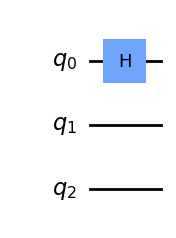

In [109]:
circuit.draw("mpl")

Make the guardian know the same thing

In [110]:
circuit.cx(0, 1)

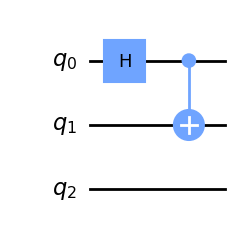

In [111]:
circuit.draw("mpl")

Setup 50% probability of having a lie

In [112]:
circuit.h(2)

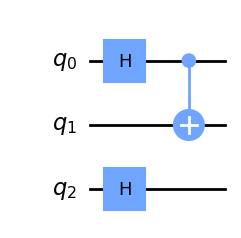

In [113]:
circuit.draw("mpl")

If guard 1 tells the truth, then guard 2 lies

In [114]:
circuit.cx(2, 1)
circuit.x(2)

circuit.cx(2, 0)
circuit.x(2)

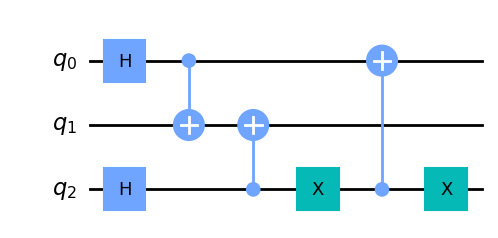

In [115]:
circuit.draw("mpl")

### Applying 'Swap' for case : "What would the other guardian say ?".

In [116]:
circuit.swap(0, 1)

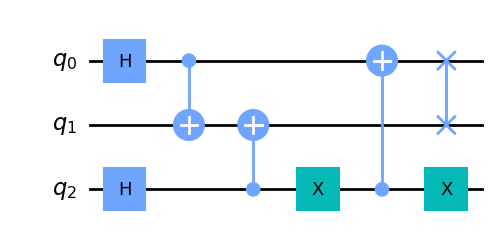

In [117]:
circuit.draw("mpl")

### The question is "What door shoud I 'NOT' open ?". So we apply 'X' gate to the qubit.

In [118]:
[circuit.x(i) for i in range(2)]

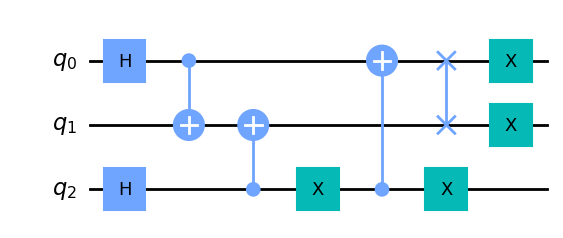

In [119]:
circuit.draw("mpl")

Who tells the truth and who lies ?

In [128]:
circuit.cx(2, 1)
circuit.x(2)

circuit.cx(2, 0)
circuit.x(2)

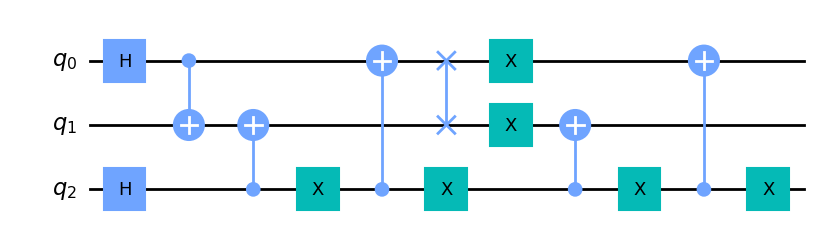

In [121]:
circuit.draw("mpl")

### Simulate the circuit


In [122]:
backend = Aer.get_backend("statevector_simulator")

In [123]:
job = backend.run(circuit)

In [124]:
result = job.result()

In [125]:
output_state = result.get_statevector(circuit, decimals=3)

In [126]:
output_state

Statevector([0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j,
             0.5+0.j],
            dims=(2, 2, 2))


### Display the results


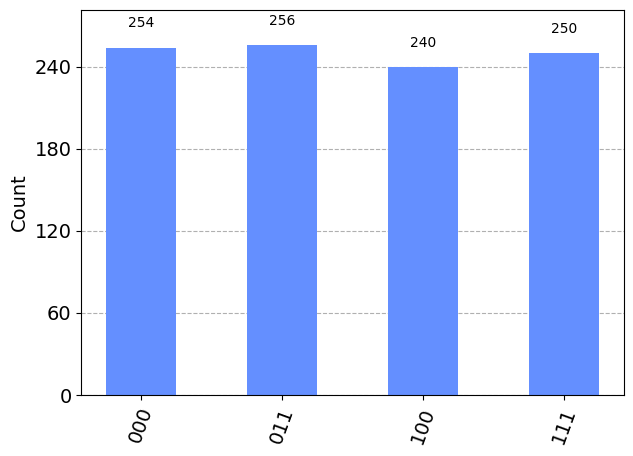

In [127]:
measure_circuit = QuantumCircuit(3, 3)
measure_circuit.measure(range(3), range(3))

backend = Aer.get_backend("qasm_simulator")
circuit = circuit.compose(measure_circuit)
result = backend.run(circuit, shots=1000).result()
count = result.get_counts(circuit)
plot_histogram(count)

## Results interpretation

If the first qubit is 0, then the first guard tells the truth and the second lies. If the first qubit is 1, then the first guard lies and the second tells the truth. 

To find the door that leads to the treasure, you could ask one guard what the other would say is the correct door. Then, you should take the opposite door.

This strategy works because the guard who tells the truth will tell you what the lying guard would say, and the lying guard would lie about what the truth-telling guard would say.